---
title: Classifying Palmer Penguins Post
author: Daniela Delgado
date: '2024-02-20'
image: "penguins.jpg"
description: "Training data to accurately classify penguins using LogisticRegression and DecisionTreeClassifier models!"
format: html
---

**Abstract**

In this blog post, we will predict the species of a penguin based on its measurements and aim to achieve 100% testing accuracy with my select choice in model. First, I will do data preparation where I will clean the dataset by removing unnecessary columns, labels, and, of course, the species column. Then, by looking at this new dataset, I will make graphs using seaborn based on the information given to see if I can spot any patterns that can help identify a penguin's species. In my graphs, I look at flipper length in relation to body mass, culmen depth and length in relation to the penguin's sex, and the correlation between the penguin's culmen depth and lengh with the flipper length. Then I made a summary table where I found the mean and the standard deviation of the culmen length and depth, the flipper length, and the body mass of the penguins on each island based on their sex to see the areas where penguins had a closer correlation to. Then, using LogisticRegression and DecisionTreeClassifier, we will find the best mean score and its corresponding column out of every set of 3 features- two quantitative and one qualitative features. We will also test this on our testing data. Afterwards, we will plot a graph panel of decision regions for the classifiers where we will see the DTC predictions for the penguin species based on the best column we got from finding the best mean with the DTC. Finally, we will see the errors our prediction model made in comparison to the actual data by looking at a color-coded confusion matrix.

As the results will show, the DecisionTreeClassifier model worked better than the LogisticRegression model yet, in the test data, LogisticRegression returned a better output with 100% while DTC returned about 98.5% accuracy. This can be due to the depth limit placed on the DTC in comparison to no limit set on the LR model. Additionally, the confusion matrix showed the DTC made a very small margin error with one penguin being mislabeled. The prediction DTC classified this penguin as Chinstrap when it was actually a Gentoo penguin. Overall, the prediction model was accurate.

In [19]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [20]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"]) #fit encoder on 'Species'

def prepare_data(df):
  #removing columns that are not needed
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  #removing when sex = .
  df = df[df["Sex"] != "."]
  #removing N/A labels
  df = df.dropna()
  #print(df)
  #turns the labels in 'Species' to a number
  y = le.transform(df["Species"])
  #print(y)
  #removing 'Species' col bc now held by y
  df = df.drop(["Species"], axis = 1)
  #converted into “one-hot encoded” 0-1 columns
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)


In [22]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


**Part 1: Exploring the data:**

Here, I constructed three interesting displayed figures and one summary table that will help draw conclusions about what features I can use for the model (DTC model).

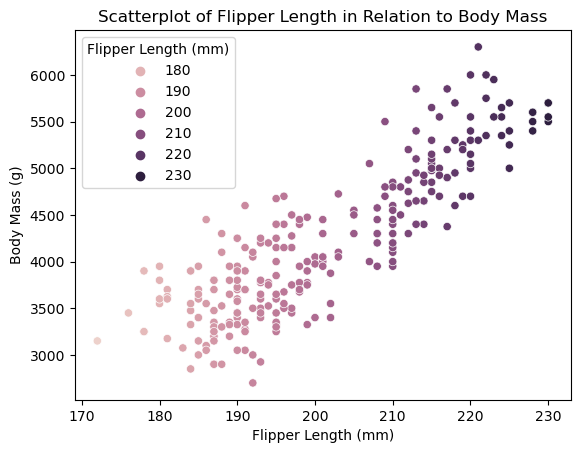

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data = X_train, x = 'Flipper Length (mm)', y = 'Body Mass (g)', hue = 'Flipper Length (mm)')

plt.title('Scatterplot of Flipper Length in Relation to Body Mass')
plt.show()

In this graph, we see the correlation between the flipper length and the body mass of penguins as the data is grouped by the flipper length. In the graph, the correlation between both seems to be positive as the longer the flipper length, the higher the body mass. This can help define a species as maybe some penguin species are smaller, which would allow us to know their body mass is lighter, thus their flipper length is smaller as well. This can be used in my model as it can use the weigths/sizes of penguins to possibibly help distinguish the species, along with the help of looking at other features to understand the outlier points in this set. 

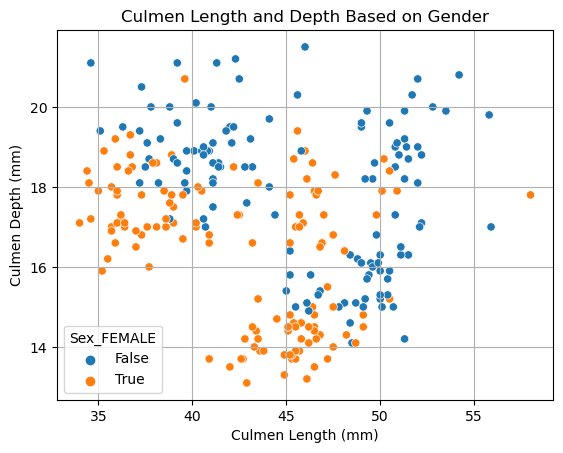

In [24]:
sns.scatterplot(data = X_train, x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)', hue = 'Sex_FEMALE')
plt.title('Culmen Length and Depth Based on Gender')
plt.grid(True)
plt.show()

In this graph, we can see the culmen depth and length in relation to the penguin's sex. The female culmens tend to be on the lower half of the graph. There also seems to be three different clusters: one on the middle left averaging on the point (40,18), another one starting at (45,16) and expanding upwards right to (50,20), and the final one being on the mid-lower part of the graph at about (45,14) to (50,16). In these three clusters, the female's culmen dimensions are smaller than the men's. This can tell us that the species of penguins all have different culmen lengths and depths, and they vary by sex. Thus, the penguin species can be distinguishable by their culmen sizes. This information can be useful in modeling as we can see if the culmen length and culmen depth compared to the gender play a role in distinguishing the species.

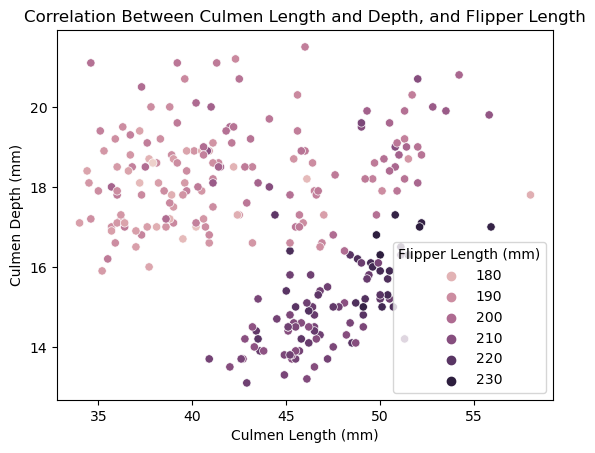

In [25]:
sns.scatterplot(data = X_train, x = 'Culmen Length (mm)', y = 'Culmen Depth (mm)', hue = 'Flipper Length (mm)')
plt.title('Correlation Between Culmen Length and Depth, and Flipper Length')
plt.show()

In this graph, we can see the correlation between the flipper length and the culmen depth/length. We can see how the deeper the culmen depth goes, the smaller the flipper and culmen lengths are. If the penguin has a medium to high range in culmen length with a lower depth, then the flipper lenght is longer. However, if both the culmen length and depth are high, then the flipper length is in about the middle size. This information can be used in modeling as we can see if the species of the penguins are identifiable based on the different correlations between the culmen dimensions and the flipper length. 

In [26]:
meanTable = X_train.groupby(['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Sex_MALE', 'Sex_FEMALE']).aggregate(
    {'Culmen Length (mm)' : ['mean', 'std'], 'Culmen Depth (mm)' : ['mean', 'std'], 'Flipper Length (mm)' : ['mean', 'std'], 'Body Mass (g)' : ['mean', 'std']})
meanTable

Culmen Length (mm)  \
                                                                              mean   
Island_Biscoe Island_Dream Island_Torgersen Sex_MALE Sex_FEMALE                      
False         False        True             False    True                37.537500   
                                            True     False               40.961111   
              True         False            False    True                43.041176   
                                            True     False               46.176087   
True          False        False            False    True                43.423077   
                                            True     False               46.595000   

                                                                           \
                                                                      std   
Island_Biscoe Island_Dream Island_Torgersen Sex_MALE Sex_FEMALE             
False         False        True             False    True        2.111200   
                                            True     False       3.273268   
              True         False            False    True        5.368843   
                                            True     False       5.930081   
True          False        False            False    True        4.061703   
                                            True     False       4.511583   

                                                                Culmen Depth (mm)  \
                                                                             mean   
Island_Biscoe Island_Dream Island_Torgersen Sex_MALE Sex_FEMALE                     
False         False        True             False    True               17.475000   
                                            True     False              19.300000   
              True         False            False    True               17.629412   
                                            True     False              19.058696   
True          False        False            False    True               15.093846   
                                            True     False              16.696667   

                                                                           \
                                                                      std   
Island_Biscoe Island_Dream Island_Torgersen Sex_MALE Sex_FEMALE             
False         False        True             False    True        0.863713   
                                            True     False       1.058856   
              True         False            False    True        0.767670   
                                            True     False       0.971271   
True          False        False            False    True        1.727795   
                                            True     False       1.738007   

                                                                Flipper Length (mm)  \
                                                                               mean   
Island_Biscoe Island_Dream Island_Torgersen Sex_MALE Sex_FEMALE                       
False         False        True             False    True                188.000000   
                                            True     False               196.000000   
              True         False            False    True                190.784314   
                                            True     False               196.782609   
True          False        False            False    True                206.507692   
                                            True     False               212.366667   

                                                                            \
                                                                       std   
Island_Biscoe Island_Dream Island_Torgersen Sex_MALE Sex_FEMALE              
False         False        True             False    True         4.661902   
                                       

In this table, we can see the mean and standard deviation values for the culmen length and depth, the flipper length, and the body mass of the penguins on each island based on their sex. This table can be helpful as we can see the how the dimensions differ based on the island the penguins are on and their sex. These can be a telling factor on the kind of species they are by seeing the grouping they fall into and if the standard deviation is too big, then we know there are more outliers that are not close to the mean. Thus, this shows that there might not be a correlatioin with that said data.

**Part 2: Choosing Features**

In [54]:
from itertools import combinations
from sklearn.model_selection import cross_val_score #use this isntead of for-loop
from sklearn.linear_model import LogisticRegression
import warnings

#warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category = FutureWarning)


score_counter = 0
# these are not actually all the columns: you'll
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Egg Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    print(cols)
    # training LR model and scoring it
    LR = LogisticRegression()
    #using cross validation on LR to avoid overfitting
    cv_scores_LR = cross_val_score(LR, X_train[cols], y_train, cv = 5) #training on remaining 80% of data

    if cv_scores_LR.mean() > score_counter:
      #updating the best score and columns of that score
      score_counter = cv_scores_LR.mean()
      col_best = cols

print('Best Score: ', score_counter)
print('Best Three Columns: ', col_best)



['Culmen Length (mm)', 'Culmen Depth (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Length (mm)', 'Flipper Length (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Length (mm)', 'Body Mass (g)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Depth (mm)', 'Flipper Length (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Depth (mm)', 'Body Mass (g)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Flipper Length (mm)', 'Body Mass (g)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Length (mm)', 'Body Mass (g)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Depth (mm)', 'Body Mass (g)', 'Sex_FEMALE', 'Sex_MALE']
['Flipper Length (mm)', 'Body Mass (g)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Length (mm)', 'Culmen Depth (mm

In [55]:
# LR with the selected better columns from the code above
cols = col_best

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)


0.99609375

Now to test LogisticRegression: 

In [56]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

1.0

Using DecisionTreeClassifier instead of Logistic Regression, here is another model choice: 

In [52]:
from itertools import combinations
from sklearn.model_selection import cross_val_score #use this isntead of for-loop
from sklearn.tree import DecisionTreeClassifier

score_counter = 0
# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Egg Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

for qual in all_qual_cols:
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols =  list(pair) + qual_cols
    print(cols)

    for i in range(1,20):
      #setting the max depth to be between 1-19 and iterating through each one
      DTC = DecisionTreeClassifier(max_depth=i)
      #using cross validation on DTC to avoid overfitting
      cv_scores_DTC = cross_val_score(DTC, X_train[cols], y_train, cv = 5)
      #updating the best score and columns of that score
      if cv_scores_DTC.mean() > score_counter:
        score_counter = cv_scores_DTC.mean()
        col_best = cols
    
print('Best Score: ', score_counter)
print('Best Three Columns: ', col_best)
print('At depth: ', i)
    



['Culmen Length (mm)', 'Culmen Depth (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Length (mm)', 'Flipper Length (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Length (mm)', 'Body Mass (g)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Depth (mm)', 'Flipper Length (mm)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Depth (mm)', 'Body Mass (g)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Flipper Length (mm)', 'Body Mass (g)', 'Clutch Completion_No', 'Clutch Completion_Yes']
['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Length (mm)', 'Flipper Length (mm)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Length (mm)', 'Body Mass (g)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Depth (mm)', 'Body Mass (g)', 'Sex_FEMALE', 'Sex_MALE']
['Flipper Length (mm)', 'Body Mass (g)', 'Sex_FEMALE', 'Sex_MALE']
['Culmen Length (mm)', 'Culmen Depth (mm

In [43]:
#Feeding the best cols
cols = col_best

DTC = DecisionTreeClassifier(max_depth=i)
DTC.fit(X_train[cols], y_train)
DTC.score(X_train[cols], y_train)

1.0

Now to test the data we do:

In [44]:
#download the test data set 
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
#prepping data
X_test, y_test = prepare_data(test)
DTC.score(X_test[cols], y_test)

0.9852941176470589

Now we are going to plot a panel of decision regions for the classifiers: 

In [45]:
from matplotlib import pyplot as plt
import numpy as np

In [46]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    #sets first two columns, which are quantitative, of X_train[cols]
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    #says remaining columns are one-hot qualitative columns
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()


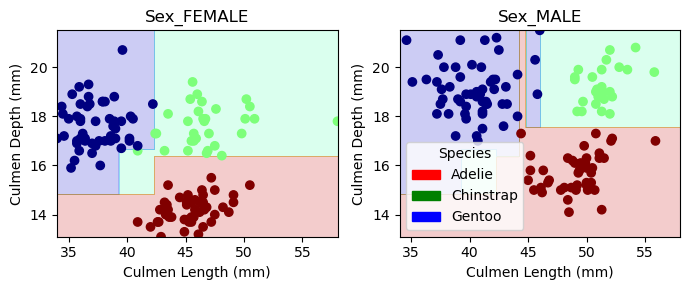

In [47]:
plot_regions(DTC, X_train[cols], y_train)

Finally, we will show a confusion matrix on the DTC model, which will be evaluated on the test set. 

In [48]:
from sklearn.metrics import confusion_matrix

actual = y_test
predict = DTC.predict(X_test[cols])

conf_matrix = confusion_matrix(actual, predict)

print(conf_matrix)

[[31  0  0]
 [ 0 10  1]
 [ 0  0 26]]


In this confusion matrix, we see the error is low, but it is seen with the Gentoo and Chinstrap penguins. The data predicted one penguin to be Chinstrap when it was actually a Gentoo penguin. With this information, I do not believe there was an error greater than others as that seems to be the only error.

**Discussion**

In this blog post, I found that using a DecisionTreeClassifier model worked better than the LogisticRegression model as seen by the best score prints, yet, in the test data, LogisticRegression returned a better output with 100% while DTC returned about 98.5% accuracy. I believe this is because LR does not have a limit on the iterations while DTC has a set depth, which can limit it from getting to 100% accuracy. Furthermore, the graphs explored in the beginning did help classify the data to guess the correct species, specifically the penguin's culmen dimensions correlating to its sex as that ended up being the best column outcome for the DTC! The three clusters I saw in that graph also proved to help identify the species as seen in the plotted graph panel of decision regions for the species classifiers. Lastly, as we can see from the confusion matrix, we can conclude the DTC prediction model is accurate.

Through the coding process, I learned and felt more comfortable in working with seaborn and the different graphs available to make since, in part one, I originally created about seven different graphs from pairplots, to boxplots, to bar graphs before deciding on my final three. Additionally, I learned what the DecisionTreeClassifies does and the different methods it has to help with prediction and other needs. One more thing I learned was what a confusion matrix was. I had to do research on it as I had no idea what the purpose of it was nor how to use the data I had to create it. However, with the help of Geeks4Geeks and the scikitlearn website on confusion matrices, I understood the purpose and what data to look at.